## MIT Movie Dataset


In [ ]:
import pandas as pd
import numpy as np

# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model_dir = '/content/drive/My Drive/Colab Notebooks/DAAN888/models/'
data_dir = '/content/drive/My Drive/Colab Notebooks/DAAN888/data/'

In [ ]:
import os

os.chdir(model_dir)
#s.chdir('/content/drive/My Drive/DAAN888/data')
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/DAAN888/models'

## Get Results for each model



In [ ]:
folder_list = os.listdir()
folder_list

['MITMovie',
 'mitmovie_spacy_customembed_drpt30',
 'mitmovie_spacy_customembed_imdb_drpt30',
 'labels_index.pkl',
 'labels_lookup.pkl',
 'word_index.pkl',
 'mitmovie_spacy_blank_drpt30',
 'mitmovie_elmo',
 'base_estimator',
 'mitmovie_crf',
 'mitmovie_pt_bert_uncased',
 'mitmovie_pt_roberta_lg',
 'mitmovie_xlnet_base_cased',
 'mitmovie_bilstm_crf',
 'bert_lg_unc_opt',
 'explainability',
 'intro_to_kt',
 'distbert_unc_opt',
 'mitmovie_pt_distilbert_base_uncased',
 'seq_micro.csv',
 'accuracy.csv',
 'macro.csv',
 'weighted.csv',
 'seq_macro.csv']

In [ ]:
folder_list = [
 'mitmovie_spacy_customembed_drpt30',
 'mitmovie_spacy_customembed_imdb_drpt30',
 'mitmovie_spacy_blank_drpt30',
 'mitmovie_elmo',
 'mitmovie_bilstm_crf',
 'mitmovie_pt_distilbert_base_uncased/model',
 'base_estimator',
 'mitmovie_crf',
 'mitmovie_pt_bert_uncased/model',
 'mitmovie_pt_roberta_lg/model']

In [ ]:
name = 'class_report_test'

collector = {}
for folder in folder_list:
  files = os.listdir(folder)
  reports = []
  for file in files:
    if name in file:
        f =  open(folder + '/' + file, 'r') 
        print('----------------------------------------')
        print(folder.upper())
        print()
        print(f.read())
        df = pd.read_fwf(folder + '/' + file, index_col=0)
        reports.append(df)
  collector[folder] = reports

In [ ]:
seq_micro = {}
seq_macro = {}
weighted = {}
macro = {}
orig_acc = {}
for key in collector.keys():
  k = key.replace('mitmovie_', '')
  k = k.replace('pt_', '')
  k = k.replace('/model', '')
  dfs = collector[key]
  for df in dfs:
    if 'B-ACTOR' in df.index.values:
      weighted[k] =  df.loc['weighted avg'].values
      macro[k] =  df.loc['macro avg'].values
      orig_acc[k] = df.loc['accuracy'].values[2]
    if 'B-ACTOR' not in df.index.values:
      seq_micro[k] = df.loc['micro avg'].values
      seq_macro[k] = df.loc['macro avg'].values


In [ ]:
weighted = pd.DataFrame.from_dict(data=weighted, orient='index', columns=['precision', 'recall', 'f1-score', 'support'])
macro = pd.DataFrame.from_dict(data=macro, orient='index', columns=['precision', 'recall', 'f1-score', 'support'])
orig_acc = pd.DataFrame.from_dict(data=orig_acc, orient='index', columns=['accuracy'])

seq_micro = pd.DataFrame.from_dict(data=seq_micro, orient='index', columns=['precision', 'recall', 'f1-score', 'support'])
seq_macro = pd.DataFrame.from_dict(data=seq_macro, orient='index', columns=['precision', 'recall', 'f1-score', 'support'])

In [ ]:
orig_acc.sort_values(by='accuracy', ascending=False, inplace=True)
orig_acc

,accuracy
bert_uncased,0.95
roberta_lg,0.95
distilbert_base_uncased,0.94
spacy_customembed_imdb_drpt30,0.93
elmo,0.93
spacy_customembed_drpt30,0.92
spacy_blank_drpt30,0.92
bilstm_crf,0.92
crf,0.92
base_estimator,0.84


In [ ]:
weighted.sort_values(by=['f1-score', 'recall', 'precision'], ascending=False, inplace=True)
weighted

,precision,recall,f1-score,support
bert_uncased,0.94,0.95,0.94,24686.0
roberta_lg,0.94,0.95,0.94,24686.0
distilbert_base_uncased,0.94,0.94,0.94,24686.0
spacy_customembed_imdb_drpt30,0.93,0.93,0.93,24686.0
elmo,0.92,0.93,0.92,24686.0
spacy_customembed_drpt30,0.92,0.92,0.92,24686.0
spacy_blank_drpt30,0.92,0.92,0.92,24686.0
bilstm_crf,0.92,0.92,0.92,24686.0
crf,0.92,0.92,0.92,24686.0
base_estimator,0.82,0.84,0.82,24686.0


In [ ]:
macro.sort_values(by=['f1-score', 'recall', 'precision'], ascending=False, inplace=True)
macro

,precision,recall,f1-score,support
bert_uncased,0.84,0.79,0.80,24686.0
roberta_lg,0.81,0.78,0.79,24686.0
distilbert_base_uncased,0.79,0.76,0.77,24686.0
spacy_customembed_imdb_drpt30,0.80,0.72,0.74,24686.0
elmo,0.79,0.71,0.74,24686.0
crf,0.77,0.71,0.73,24686.0
spacy_blank_drpt30,0.79,0.70,0.73,24686.0
spacy_customembed_drpt30,0.76,0.70,0.72,24686.0
bilstm_crf,0.76,0.70,0.72,24686.0
base_estimator,0.64,0.50,0.54,24686.0


In [ ]:
seq_micro.sort_values(by=['f1-score', 'recall', 'precision'], ascending=False, inplace=True)
seq_micro

,precision,recall,f1-score,support
roberta_lg,0.88,0.89,0.89,5339.0
bert_uncased,0.87,0.89,0.88,5339.0
distilbert_base_uncased,0.87,0.88,0.87,5339.0
spacy_customembed_imdb_drpt30,0.87,0.86,0.86,5339.0
spacy_customembed_drpt30,0.87,0.85,0.86,5339.0
spacy_blank_drpt30,0.86,0.85,0.85,5339.0
crf,0.86,0.84,0.85,5339.0
bilstm_crf,0.85,0.84,0.85,5339.0
elmo,0.81,0.83,0.82,5339.0
base_estimator,0.53,0.61,0.57,5339.0


In [ ]:
seq_macro.sort_values(by=['f1-score', 'recall', 'precision'], ascending=False, inplace=True)
seq_macro

,precision,recall,f1-score,support
bert_uncased,0.79,0.82,0.80,5339.0
roberta_lg,0.78,0.79,0.79,5339.0
distilbert_base_uncased,0.76,0.77,0.76,5339.0
spacy_customembed_imdb_drpt30,0.77,0.74,0.75,5339.0
crf,0.77,0.72,0.74,5339.0
spacy_blank_drpt30,0.78,0.71,0.73,5339.0
spacy_customembed_drpt30,0.75,0.71,0.72,5339.0
bilstm_crf,0.75,0.70,0.72,5339.0
elmo,0.71,0.70,0.70,5339.0
base_estimator,0.45,0.48,0.45,5339.0


In [ ]:
weighted.to_csv('weighted.csv')
macro.to_csv('macro.csv')
orig_acc.to_csv('accuracy.csv')

seq_micro.to_csv('seq_micro.csv')
seq_macro.to_csv('seq_macro.csv')



In [ ]:
import matplotlib.pyplot as plt

In [ ]:
new_names= ['BERT Lg Uncased',
'RoBERTa Lg Cased',
'DistilBERT Base Uncased',
'Spacy w IMDB Embed',
'ELMO embeddings BiLSTM',
'Spacy w Movie Embed',
'Spacy Blank',
'BiLSTM + CRF',
'CRF',
'Baseline Estimator']

orig_names = ['bert_uncased',
'roberta_lg',
'distilbert_base_uncased',
'spacy_customembed_imdb_drpt30',
'elmo',
'spacy_customembed_drpt30',
'spacy_blank_drpt30',
'bilstm_crf',
'crf',
'base_estimator']

In [ ]:
macro.index = macro.index.map(dict(zip(orig_names, new_names)))

In [ ]:
macro.sort_values(by=['f1-score', 'recall', 'precision'], ascending=True, inplace=True)
macro

,precision,recall,f1-score,support
Baseline Estimator,0.64,0.50,0.54,24686.0
Spacy w Movie Embed,0.76,0.70,0.72,24686.0
BiLSTM + CRF,0.76,0.70,0.72,24686.0
Spacy Blank,0.79,0.70,0.73,24686.0
CRF,0.77,0.71,0.73,24686.0
ELMO embeddings BiLSTM,0.79,0.71,0.74,24686.0
Spacy w IMDB Embed,0.80,0.72,0.74,24686.0
DistilBERT Base Uncased,0.79,0.76,0.77,24686.0
RoBERTa Lg Cased,0.81,0.78,0.79,24686.0
BERT Lg Uncased,0.84,0.79,0.80,24686.0


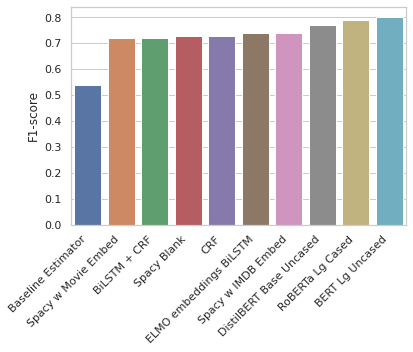

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.barplot(x=weighted.index, y='f1-score', data=macro)
ax.set_ylabel('F1-score')
ax.set_xticklabels(macro.index, rotation=45, ha='right');